<a href="https://colab.research.google.com/github/KaxitPandya/699-Project/blob/main/ECE_699A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# importing variables from json:
import json
with open('/content/input.json', 'r') as f:
    input_data = json.load(f)

In [74]:
!pip install keras-tuner

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import keras_tuner as kt

In [76]:
df = pd.read_csv(input_data['dataset_path'])

print("First 5 rows:")
display(df.head())

print("\nDataset shape:", df.shape)
print("\nBasic statistics:")
display(df.describe())

print("\nBasic Info:")
display(df.info())

First 5 rows:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
0,0.099653,0.387879,0.322036,0.015679,0.007154,0.023679,0.204062,0.042123,0.029575,433.49060
1,0.062917,0.218182,0.224337,0.020886,0.013045,0.036076,0.140909,0.175420,0.106167,83.50726
2,0.106332,0.218182,0.418960,0.028977,0.034632,0.047969,0.448081,0.325483,0.161073,263.37860
3,0.031659,0.151515,0.281100,0.017399,0.032371,0.053789,0.210542,0.187923,0.100241,56.77525
4,0.033796,0.230303,0.278414,0.017956,0.007300,0.019674,0.181456,0.030828,0.028489,188.75957



Dataset shape: (557, 10)

Basic statistics:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,0.177335,0.516218,0.268200,0.077724,0.091579,0.088850,0.457139,0.294913,0.155115,268.660111
std,0.136919,0.180190,0.079977,0.114705,0.108215,0.105918,0.159086,0.117612,0.091425,137.698689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.079215,0.424242,0.228552,0.035422,0.049701,0.048628,0.352073,0.221484,0.112609,167.790560
50%,0.145338,0.545455,0.265132,0.045296,0.064865,0.061392,0.447573,0.287911,0.140604,260.587620
75%,0.235506,0.648485,0.304128,0.063862,0.085831,0.079590,0.556720,0.353344,0.177832,364.213590
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,672.752440



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        557 non-null    float64
 1   age         557 non-null    float64
 2   site_index  557 non-null    float64
 3   band1_mean  557 non-null    float64
 4   band2_mean  557 non-null    float64
 5   band3_mean  557 non-null    float64
 6   band4_mean  557 non-null    float64
 7   band5_mean  557 non-null    float64
 8   band7_mean  557 non-null    float64
 9   Target      557 non-null    float64
dtypes: float64(10)
memory usage: 43.6 KB


None

In [77]:
print("\nCorrelation Matrix:")
corr_matrix = df.corr(numeric_only=True)
display(corr_matrix)


Correlation Matrix:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
area,1.000000,0.231364,-0.003540,0.020924,0.030942,0.027399,0.119873,0.165566,0.098329,0.154633
age,0.231364,1.000000,-0.060307,0.140203,0.112850,0.103594,-0.008022,-0.055940,-0.005756,0.692056
site_index,-0.003540,-0.060307,1.000000,0.058555,0.028014,0.039007,0.045125,-0.069441,-0.060608,0.219984
band1_mean,0.020924,0.140203,0.058555,1.000000,0.987459,0.989245,0.323357,0.516815,0.805267,0.115859
band2_mean,0.030942,0.112850,0.028014,0.987459,1.000000,0.994283,0.393906,0.601437,0.862561,0.062973
band3_mean,0.027399,0.103594,0.039007,0.989245,0.994283,1.000000,0.337231,0.576497,0.862780,0.068490
band4_mean,0.119873,-0.008022,0.045125,0.323357,0.393906,0.337231,1.000000,0.815983,0.558893,-0.136642
band5_mean,0.165566,-0.055940,-0.069441,0.516815,0.601437,0.576497,0.815983,1.000000,0.870213,-0.239236
band7_mean,0.098329,-0.005756,-0.060608,0.805267,0.862561,0.862780,0.558893,0.870213,1.000000,-0.120668
Target,0.154633,0.692056,0.219984,0.115859,0.062973,0.068490,-0.136642,-0.239236,-0.120668,1.000000


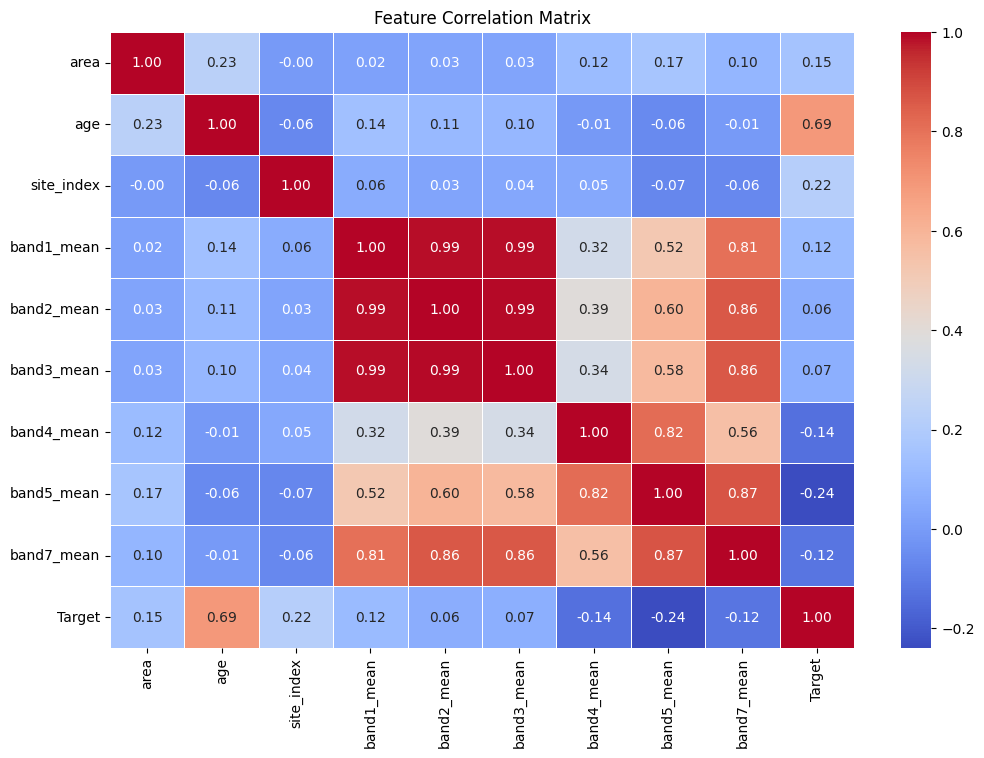

In [78]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [79]:
# Correlation Analysis
print("\n\033[1m1. Correlation Analysis\033[0m")
numeric_df = df.select_dtypes(include=[np.number])

# Pearson correlation
pearson_corr = numeric_df.corr()
print("\nPearson Correlation Matrix:")
display(pearson_corr)

# Spearman correlation (for non-linear relationships)
spearman_corr = numeric_df.corr(method='spearman')
print("\nSpearman Rank Correlation Matrix:")
display(spearman_corr)


1. Correlation Analysis

Pearson Correlation Matrix:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
area,1.000000,0.231364,-0.003540,0.020924,0.030942,0.027399,0.119873,0.165566,0.098329,0.154633
age,0.231364,1.000000,-0.060307,0.140203,0.112850,0.103594,-0.008022,-0.055940,-0.005756,0.692056
site_index,-0.003540,-0.060307,1.000000,0.058555,0.028014,0.039007,0.045125,-0.069441,-0.060608,0.219984
band1_mean,0.020924,0.140203,0.058555,1.000000,0.987459,0.989245,0.323357,0.516815,0.805267,0.115859
band2_mean,0.030942,0.112850,0.028014,0.987459,1.000000,0.994283,0.393906,0.601437,0.862561,0.062973
band3_mean,0.027399,0.103594,0.039007,0.989245,0.994283,1.000000,0.337231,0.576497,0.862780,0.068490
band4_mean,0.119873,-0.008022,0.045125,0.323357,0.393906,0.337231,1.000000,0.815983,0.558893,-0.136642
band5_mean,0.165566,-0.055940,-0.069441,0.516815,0.601437,0.576497,0.815983,1.000000,0.870213,-0.239236
band7_mean,0.098329,-0.005756,-0.060608,0.805267,0.862561,0.862780,0.558893,0.870213,1.000000,-0.120668
Target,0.154633,0.692056,0.219984,0.115859,0.062973,0.068490,-0.136642,-0.239236,-0.120668,1.000000



Spearman Rank Correlation Matrix:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
area,1.000000,0.283037,0.022876,0.213706,0.189512,0.208398,0.159875,0.226184,0.231779,0.226292
age,0.283037,1.000000,-0.038502,0.288769,0.240152,0.201699,0.001891,-0.038970,0.040546,0.664862
site_index,0.022876,-0.038502,1.000000,-0.176554,-0.242914,-0.211765,-0.001725,-0.120921,-0.181714,0.336020
band1_mean,0.213706,0.288769,-0.176554,1.000000,0.839283,0.903691,0.289858,0.413800,0.595250,0.147065
band2_mean,0.189512,0.240152,-0.242914,0.839283,1.000000,0.920707,0.482088,0.595893,0.751582,0.025151
band3_mean,0.208398,0.201699,-0.211765,0.903691,0.920707,1.000000,0.304499,0.503779,0.717333,0.029429
band4_mean,0.159875,0.001891,-0.001725,0.289858,0.482088,0.304499,1.000000,0.838799,0.656505,-0.143543
band5_mean,0.226184,-0.038970,-0.120921,0.413800,0.595893,0.503779,0.838799,1.000000,0.909992,-0.240114
band7_mean,0.231779,0.040546,-0.181714,0.595250,0.751582,0.717333,0.656505,0.909992,1.000000,-0.173321
Target,0.226292,0.664862,0.336020,0.147065,0.025151,0.029429,-0.143543,-0.240114,-0.173321,1.000000



2. Visual Relationships


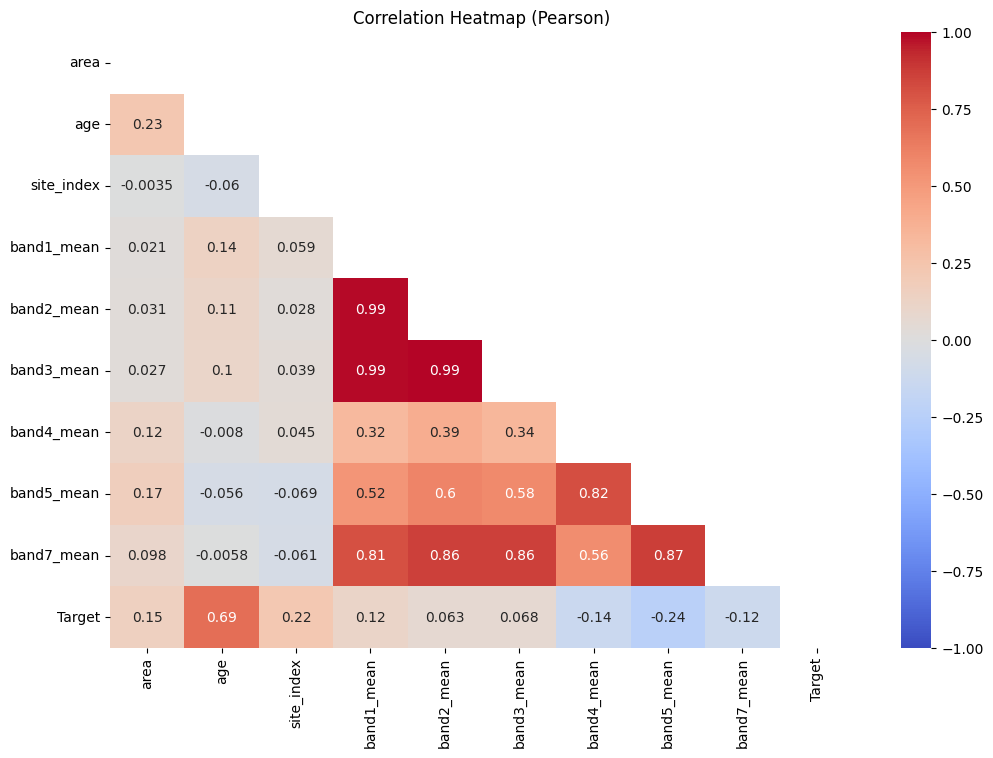

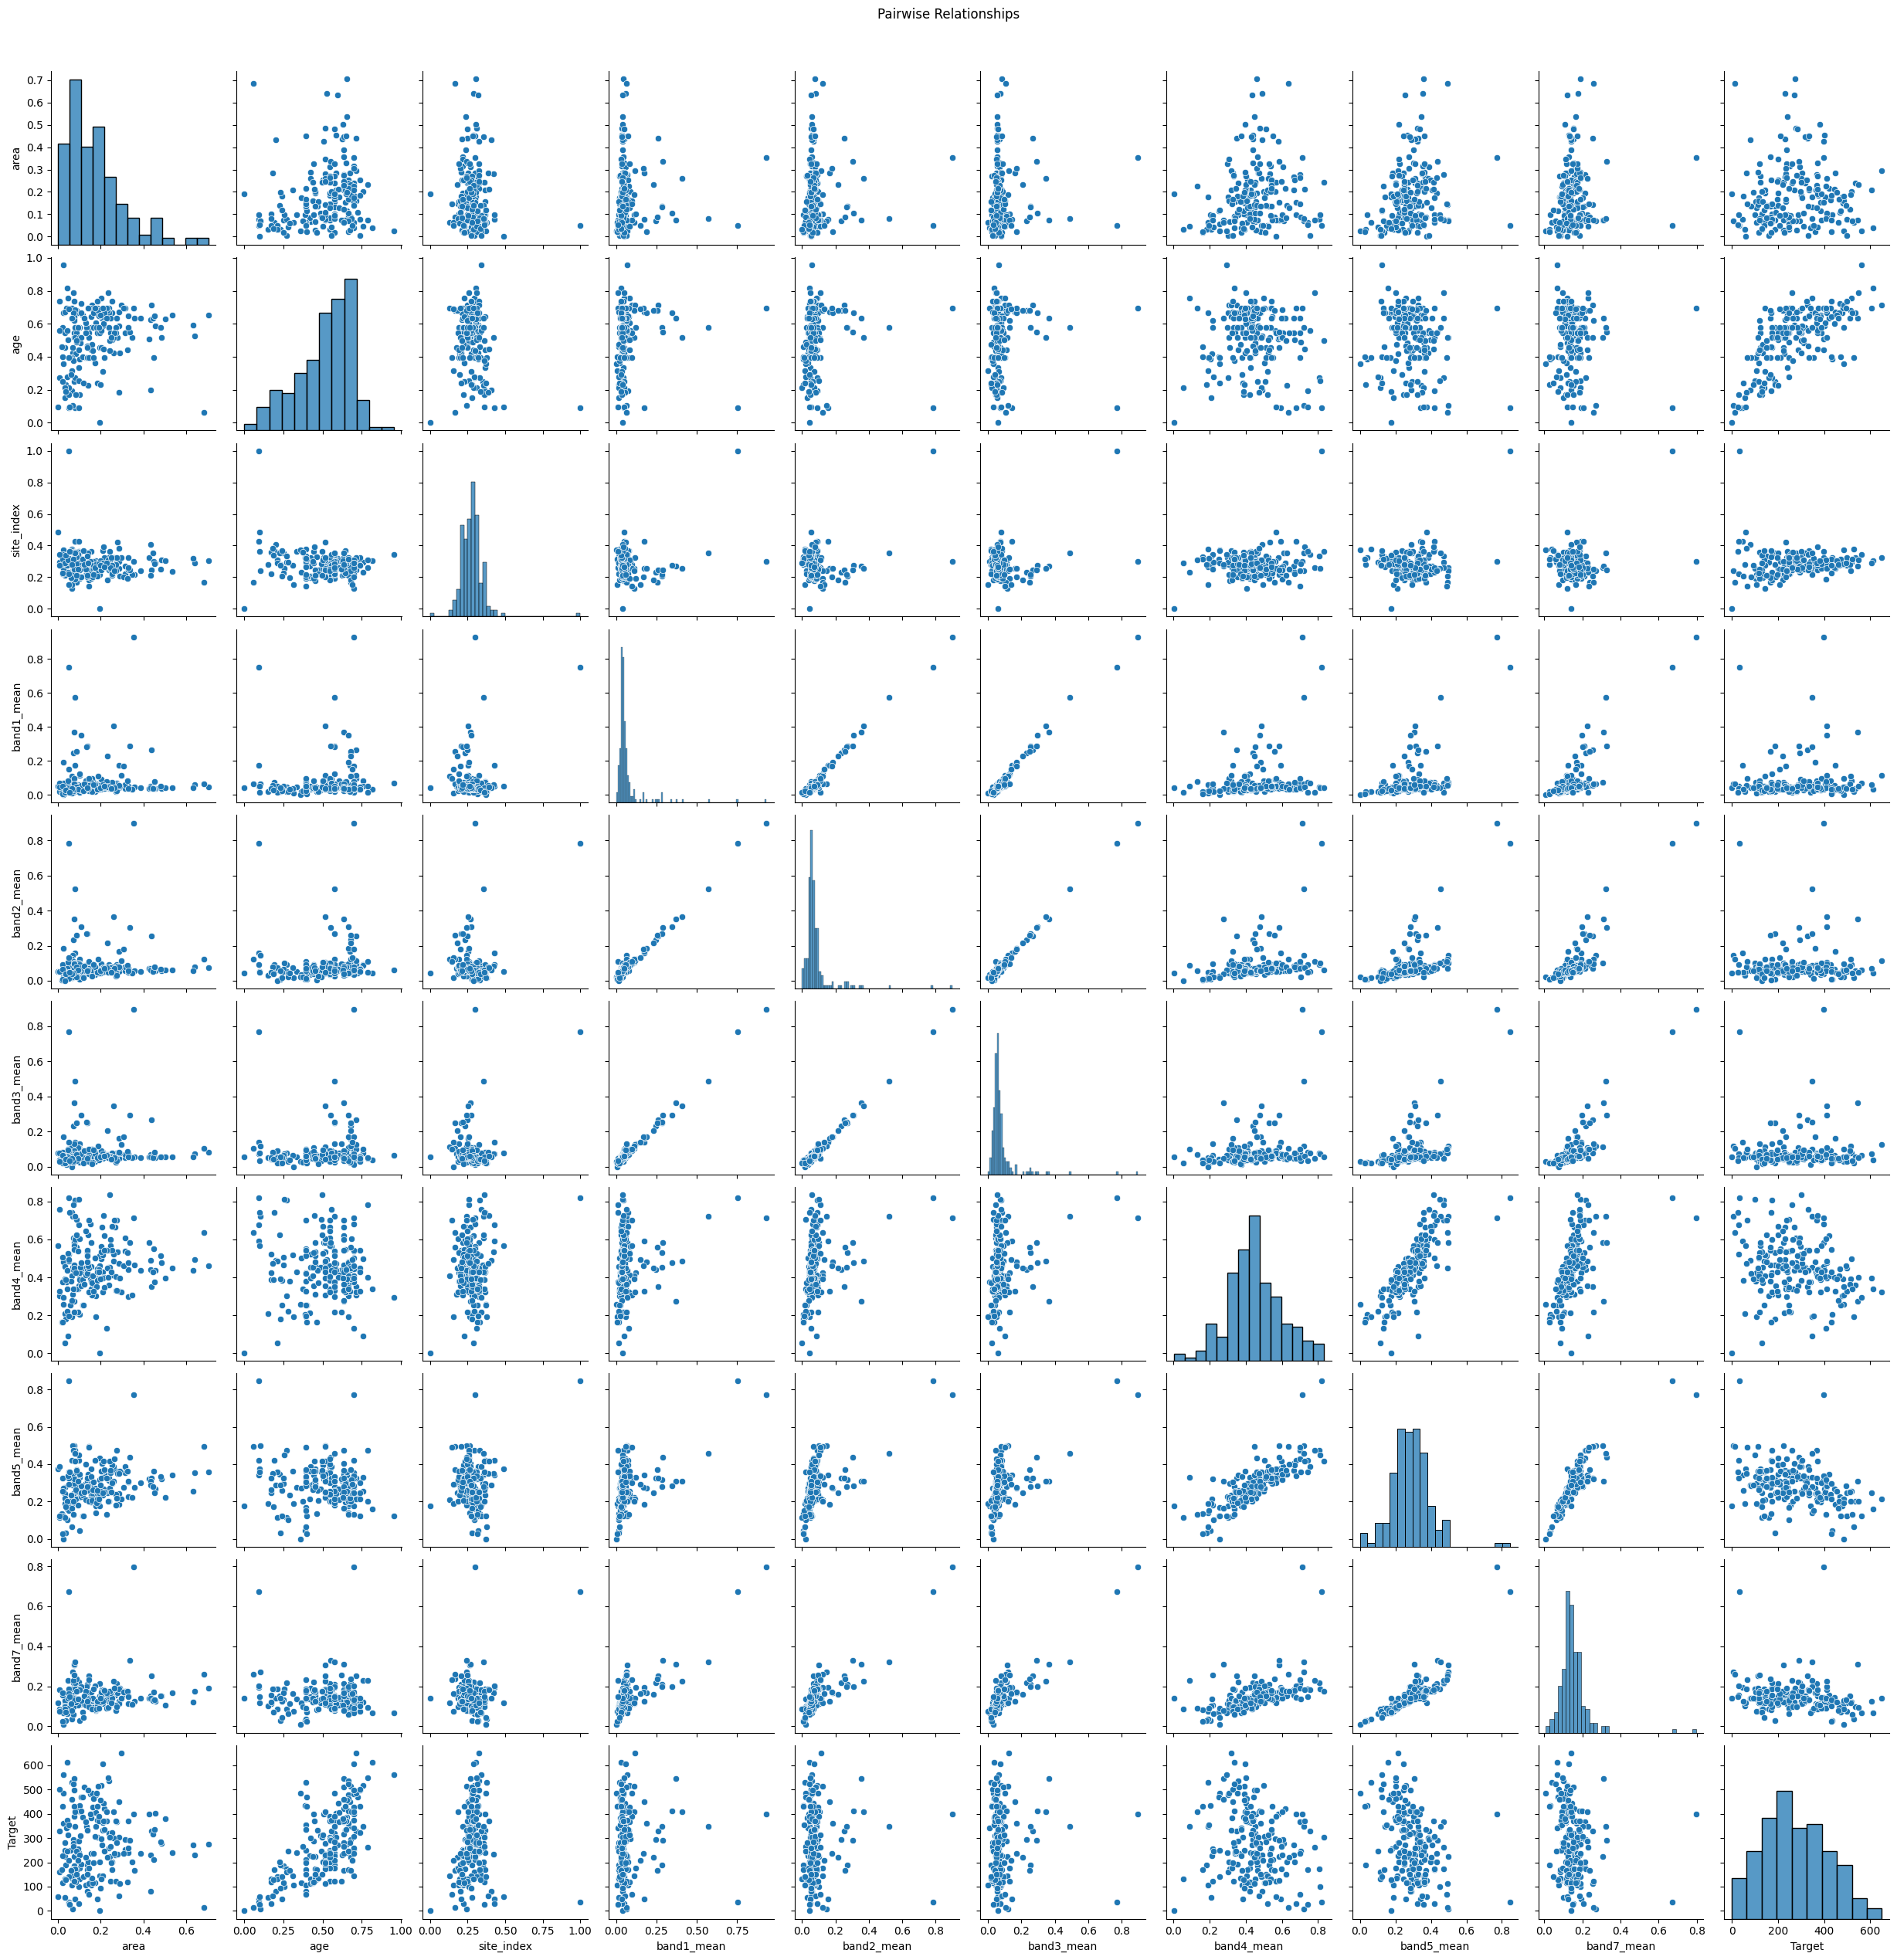

In [80]:
# Visualization
print("\n\033[1m2. Visual Relationships\033[0m")

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pearson_corr,
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=np.triu(np.ones_like(pearson_corr)))
plt.title('Correlation Heatmap (Pearson)')
plt.show()

# Pairplot for multivariate analysis
sns.pairplot(df.sample(min(200, len(df)), random_state=1))
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [81]:
# Statistical Testing
print("\n\033[1m3. Statistical Significance Testing\033[0m")

# For 2 numeric variables
if len(numeric_df.columns) >= 2:
    col1, col2 = numeric_df.columns[:2]
    r, p = stats.pearsonr(df[col1], df[col2])
    print(f"\nPearson test between {col1} and {col2}:")
    print(f"Correlation Coefficient: {r:.3f}")
    print(f"P-value: {p:.4f}")


3. Statistical Significance Testing

Pearson test between area and age:
Correlation Coefficient: 0.231
P-value: 0.0000


In [82]:
# Categorical Relationships
print("\n\033[1m4. Categorical Analysis\033[0m")

# For categorical vs numerical
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
if len(categorical_cols) > 0 and len(numeric_df.columns) > 0:
    cat_var = categorical_cols[0]
    num_var = numeric_df.columns[0]

    plt.figure(figsize=(10,6))
    sns.boxplot(x=cat_var, y=num_var, data=df)
    plt.title(f'{cat_var} vs {num_var}')
    plt.xticks(rotation=45)
    plt.show()


4. Categorical Analysis



5. Advanced Relationships


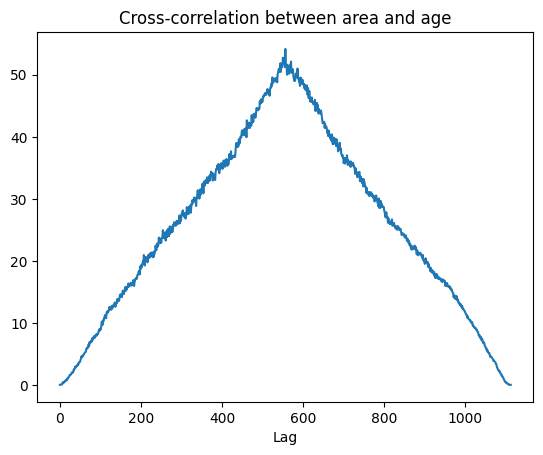

In [83]:
print("\n\033[1m5. Advanced Relationships\033[0m")

# Cross-correlation (lagged relationships)
if len(numeric_df.columns) >= 2:
    col1, col2 = numeric_df.columns[:2]
    cross_corr = np.correlate(df[col1], df[col2], mode='full')
    plt.plot(cross_corr)
    plt.title(f'Cross-correlation between {col1} and {col2}')
    plt.xlabel('Lag')
    plt.show()

# Model Training

In [84]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv(input_data['dataset_path'])

X = data.drop("Target", axis=1).values
y = data["Target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
# ### not scale x
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Normalize the target variable
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [85]:
# # 2. Define the Sparse Autoencoder Model in TensorFlow/Keras
# input_dim = X_train.shape[1]
# latent_dim = 16  # tune this based on dataset
# #### hpo here

# #input
# input_layer = keras.Input(shape=(input_dim,))

# # Encoder
# encoded = layers.Dense(64, activation='relu')(input_layer)
# encoded = layers.BatchNormalization()(encoded)
# encoded = layers.Dropout(0.2)(encoded)
# latent = layers.Dense(latent_dim, activation='linear',
#                       activity_regularizer=regularizers.l1(1e-3))(encoded)
# ### ## activity_regularizer, lr, do HPO,
# ### start final report

# # Decoder
# decoded = layers.Dense(64, activation='relu')(latent)
# decoded = layers.BatchNormalization()(decoded)
# decoded = layers.Dropout(0.2)(decoded)
# decoded = layers.Dense(input_dim, activation='linear')(decoded)

# autoencoder = keras.Model(inputs=input_layer, outputs=decoded, name="sparse_autoencoder")
# autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.summary()
#

In [86]:
# TRY DECREASE LAYER, Python class, plotting everything(loss,lr,acc, etc),
# activity_regularizer l1 play with it and relation with lr, powerpoint to it,
# Add Sparse

def build_model(hp):
    input_dim = X_train.shape[1]  # Number of input features

    # Hyperparameters to tune:
    encoder_units = hp.Int('encoder_units', min_value=8, max_value=256, step=2)
    decoder_units = hp.Int('decoder_units', min_value=8, max_value=256, step=2)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.8, step=0.1)
    latent_dim = hp.Int('latent_dim', min_value=2, max_value=128, step=2)
    l1_reg = hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log')
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    # Input layer
    input_layer = keras.Input(shape=(input_dim,))

    # Encoder
    x = layers.Dense(encoder_units, activation='relu')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    latent = layers.Dense(latent_dim, activation='linear', activity_regularizer=regularizers.l1(l1_reg), name='latent')(x)

    # Decoder
    x = layers.Dense(decoder_units, activation='relu')(latent)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    output_layer = layers.Dense(input_dim, activation='linear')(x)

    # Define the autoencoder model
    model = keras.Model(inputs=input_layer, outputs=output_layer, name="sparse_autoencoder")

    # Compile the model with the tunable learning rate
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mse')

    return model

#2
# def build_model(hp):
#     input_dim = X_train.shape[1]  # Number of input features

#     # Hyperparameters to tune:
#     encoder_units_1 = hp.Int('encoder_units_1', min_value=8, max_value=256, step=2)
#     encoder_units_2 = hp.Int('encoder_units_2', min_value=8, max_value=256, step=2)
#     decoder_units_1 = hp.Int('decoder_units_1', min_value=8, max_value=256, step=2)
#     decoder_units_2 = hp.Int('decoder_units_2', min_value=8, max_value=256, step=2)
#     dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.8, step=0.1)
#     latent_dim = hp.Int('latent_dim', min_value=2, max_value=128, step=2)
#     l1_reg = hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log')
#     learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

#     # Input layer
#     input_layer = keras.Input(shape=(input_dim,))

#     # Encoder: Increased layers
#     x = layers.Dense(encoder_units_1, activation='relu')(input_layer)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     x = layers.Dense(encoder_units_2, activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     latent = layers.Dense(latent_dim, activation='linear',
#                           activity_regularizer=regularizers.l1(l1_reg),
#                           name='latent')(x)

#     # Decoder: Increased layers
#     x = layers.Dense(decoder_units_1, activation='relu')(latent)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     x = layers.Dense(decoder_units_2, activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     output_layer = layers.Dense(input_dim, activation='linear')(x)

#     # Define and compile the autoencoder model
#     model = keras.Model(inputs=input_layer, outputs=output_layer, name="sparse_autoencoder")
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#                   loss='mse')

#     return model


# Set up the Keras Tuner with Random Search (other tuners like BayesianOptimization are also available)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,           # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build for each trial
    directory='hpo_dir',
    project_name='sparse_autoencoder'
)

# Print a summary of the search space
tuner.search_space_summary()

# Run the hyperparameter search.
# Here we train the model as an autoencoder (input is the same as output).
tuner.search(X_train, X_train, epochs=500, validation_split=0.1)

# Retrieve the best model found by the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Display a summary of the best model architecture
best_model.summary()



early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Build the autoencoder with the best hyperparameters and train it
autoencoder = best_model
history = autoencoder.fit(X_train, X_train,
                          epochs=500,
                          batch_size=8,
                          validation_split=0.1,
                          callbacks=[early_stop],
                          verbose=1)

# Confirm that it’s a Sparse Autoencoder (the latent layer includes an L1 regularizer)
print("Sparse Autoencoder defined with L1 regularization on the latent layer (named 'latent').")

Trial 50 Complete [00h 01m 42s]
val_loss: 0.025819672271609306

Best val_loss So Far: 0.012632100842893124
Total elapsed time: 05h 34m 32s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sparse_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 158)                 │           1,580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 158)                 │             632 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 158)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent (Dense)                       │ (None, 96)                  │          15,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           4,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,985 (89.79 KB)

 Trainable params: 22,569 (88.16 KB)

 Non-trainable params: 416 (1.62 KB)

Epoch 1/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2723 - val_loss: 0.1421
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2432 - val_loss: 0.2646
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2039 - val_loss: 0.1625
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1817 - val_loss: 0.0797
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2128 - val_loss: 0.2107
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2456 - val_loss: 0.0953
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1818 - val_loss: 0.1445
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1766 - val_loss: 0.1186
Epoch 9/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1785 - val_loss: 0.1279
Epoch 10/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1623 - val_loss: 0.0730
Epoch 11/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1598 - val_loss: 0.0669
Epoch 12/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1

In [87]:
# 4. Create the Encoder Model for Feature Extraction
# Create a model to extract the latent features
encoder = keras.Model(inputs=best_model.input, outputs=best_model.get_layer("latent").output, name="encoder")
latent_train = encoder.predict(X_train)
latent_test = encoder.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [88]:
# 5. Build and Train a Downstream Regression Model for AGB Prediction
def build_regressor_model(hp):
    reg_input = keras.Input(shape=(latent_train.shape[1],))

    units_1 = hp.Int('units_1', min_value=16, max_value=128, step=16, default=32)
    units_2 = hp.Int('units_2', min_value=8, max_value=64, step=8, default=16)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1, default=0.2)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log', default=1e-3)

    x = layers.Dense(units_1, activation='relu')(reg_input)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Dense(units_2, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    reg_output = layers.Dense(1, activation='linear')(x)

    regressor = keras.Model(inputs=reg_input, outputs=reg_output, name="regressor")

    regressor.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='mse', metrics=['mae'])
    return regressor

#2
# def build_regressor_model(hp):
#     reg_input = keras.Input(shape=(latent_train.shape[1],))

#     # Hyperparameters for layer sizes
#     units_1 = hp.Int('units_1', min_value=32, max_value=256, step=32, default=64)
#     units_2 = hp.Int('units_2', min_value=16, max_value=128, step=16, default=32)
#     units_3 = hp.Int('units_3', min_value=8, max_value=64, step=8, default=16)
#     # Optionally add even another layer:
#     # units_4 = hp.Int('units_4', min_value=8, max_value=64, step=8, default=16)

#     dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1, default=0.2)
#     learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log', default=1e-3)

#     # First hidden layer
#     x = layers.Dense(units_1, activation='relu')(reg_input)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     # Second hidden layer
#     x = layers.Dense(units_2, activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     # Third hidden layer (new layer)
#     x = layers.Dense(units_3, activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     reg_output = layers.Dense(1, activation='linear')(x)

#     regressor = keras.Model(inputs=reg_input, outputs=reg_output, name="regressor")

#     regressor.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#                       loss='mse', metrics=['mae'])
#     return regressor


# Then set up the tuner:
tuner_regressor = kt.RandomSearch(
    build_regressor_model,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=1,
    directory='hpo_regressor_dir2',
    project_name='regressor_agb'
)

tuner_regressor.search(latent_train, y_train, epochs=300, validation_split=0.1)

best_regressor = tuner_regressor.get_best_models(num_models=1)[0]
best_regressor.summary()


reg_epochs = 500
best_regressor.fit(latent_train, y_train,
              epochs=reg_epochs,
              batch_size=8,
              validation_split=0.1,
              verbose=1)

Trial 50 Complete [00h 01m 04s]
val_loss: 0.19206653535366058

Best val_loss So Far: 0.17114299535751343
Total elapsed time: 05h 33m 16s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "regressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 48)                  │           4,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48)                  │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,281 (20.63 KB)

 Trainable params: 5,169 (20.19 KB)

 Non-trainable params: 112 (448.00 B)

Epoch 1/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3298 - mae: 0.4535 - val_loss: 0.1916 - val_mae: 0.3353
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3428 - mae: 0.4647 - val_loss: 0.1898 - val_mae: 0.3256
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3623 - mae: 0.4979 - val_loss: 0.2271 - val_mae: 0.3801
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3890 - mae: 0.4872 - val_loss: 0.1964 - val_mae: 0.3491
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2950 - mae: 0.4377 - val_loss: 0.2029 - val_mae: 0.3525
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3777 - mae: 0.4868 - val_loss: 0.1808 - val_mae: 0.3293
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2937 - mae: 0.4311 - val_loss: 0.1977 - val_mae: 0.3447
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2761 - mae: 0.4168 - val_loss: 0.2062 - val_mae: 0.3605
Epoch 9/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.339

In [89]:
y_pred_scaled = best_regressor.predict(latent_test).flatten()
# Inverse transform predictions and true values to get original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

mse_value = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)
print(f"Test MSE for AGB prediction: {mse_value:.4f}")
print(f"Test R^2 for AGB prediction: {r2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Test MSE for AGB prediction: 7824.4437
Test R^2 for AGB prediction: 0.5528


In [90]:
# make graphs

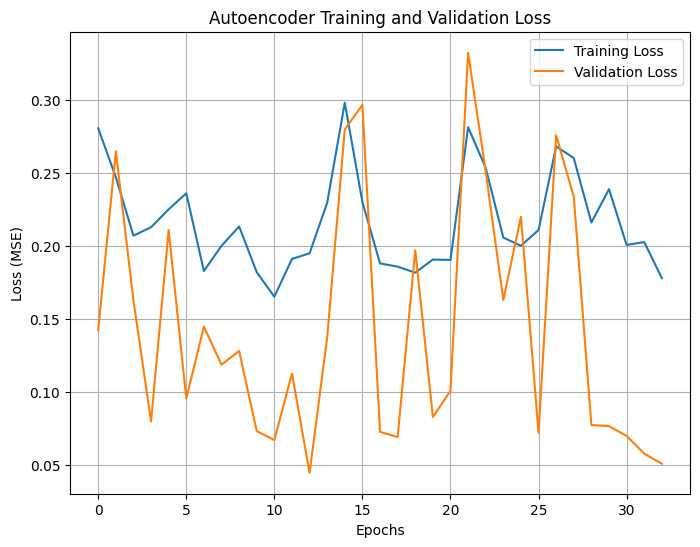

Autoencoder loss history plot saved as 'autoencoder_loss_history.png'.


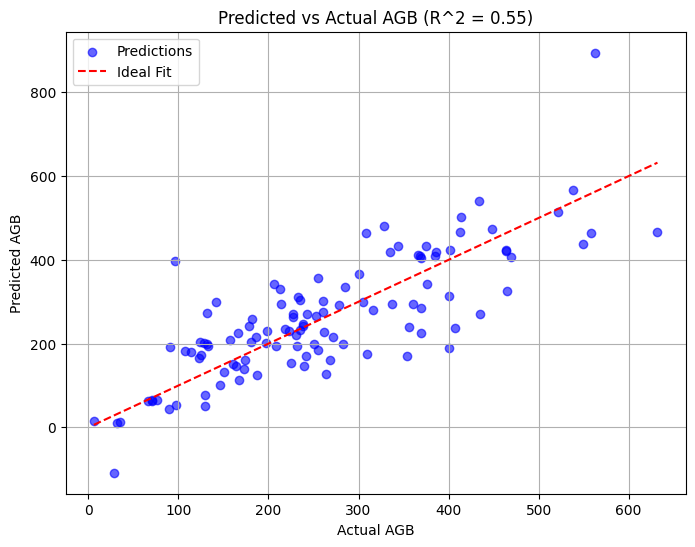

Predicted vs Actual AGB plot saved as 'predicted_vs_actual.png'.


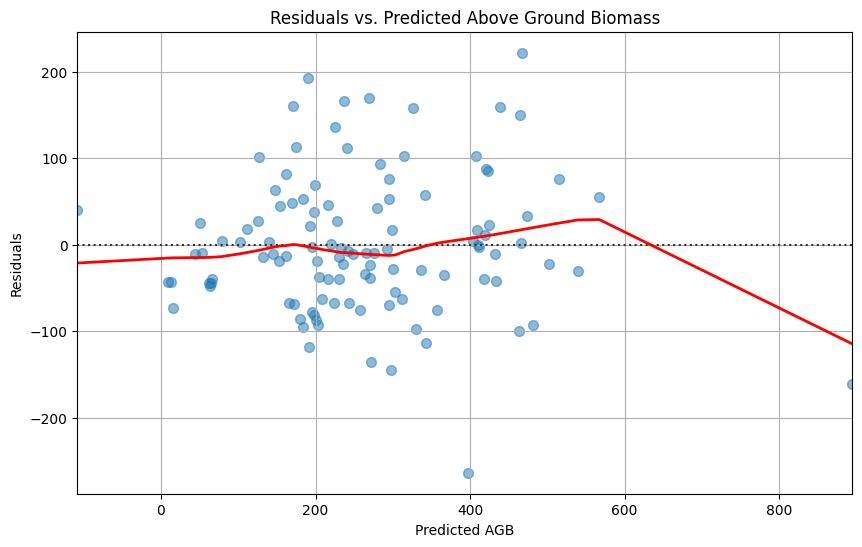

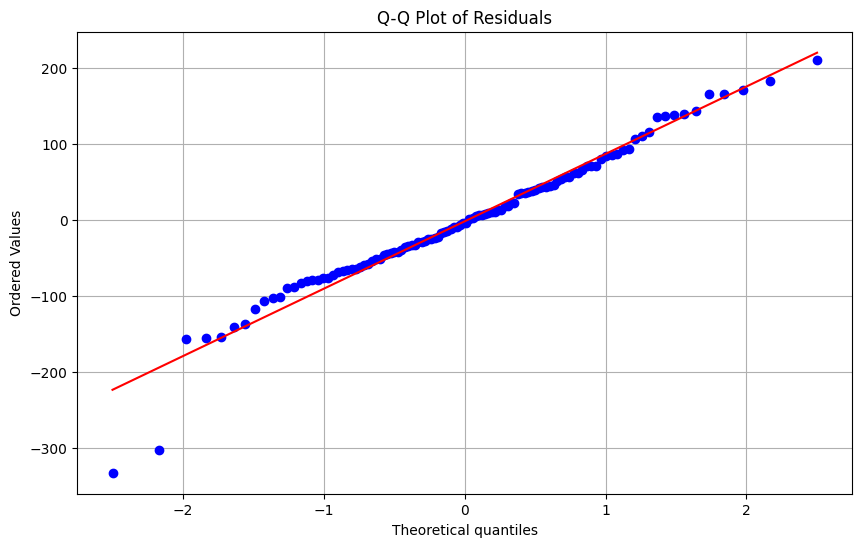

TypeError: Cannot clone object '<Functional name=regressor, built=True>' (type <class 'keras.src.models.functional.Functional'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [92]:
# Plot and save the Autoencoder training loss history
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Autoencoder Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('autoencoder_loss_history.png')
plt.show()
print("Autoencoder loss history plot saved as 'autoencoder_loss_history.png'.")

# Plot and save the predicted vs. actual AGB scatter plot for the regressor
plt.figure(figsize=(8,6))
plt.scatter(y_test_inv, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], 'r--', label='Ideal Fit')
plt.xlabel('Actual AGB')
plt.ylabel('Predicted AGB')
plt.title(f'Predicted vs Actual AGB (R^2 = {r2:.2f})')
plt.legend()
plt.grid(True)
plt.savefig('predicted_vs_actual.png')
plt.show()
print("Predicted vs Actual AGB plot saved as 'predicted_vs_actual.png'.")

# Residual plot
residuals = y_test_inv - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={"s": 50, "alpha": 0.5}, line_kws={"color": "red", "lw": 2})
plt.xlabel('Predicted AGB')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Above Ground Biomass')
plt.grid(True)
plt.show()

import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

from sklearn.model_selection import learning_curve

# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_regressor, latent_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training error')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression metrics
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Feature importance (example for tree-based models)
importances = best_regressor.feature_importances_
feature_names = data.columns[:-1]  # Assuming the last column is the target

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

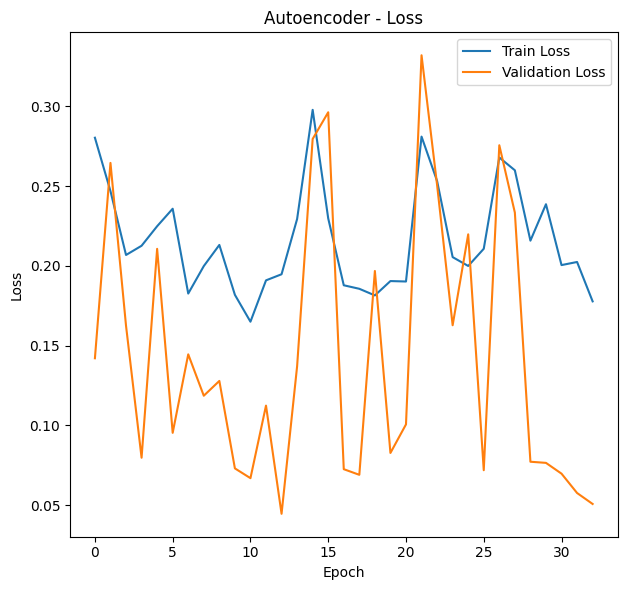

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1283 - mae: 0.2749 - val_loss: 0.2062 - val_mae: 0.3674
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1832 - mae: 0.3334 - val_loss: 0.2253 - val_mae: 0.3820
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1298 - mae: 0.2831 - val_loss: 0.2231 - val_mae: 0.3794
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1089 - mae: 0.2563 - val_loss: 0.2175 - val_mae: 0.3716
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1153 - mae: 0.2641 - val_loss: 0.2103 - val_mae: 0.3637
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0964 - mae: 0.2437 - val_loss: 0.2058 - val_mae: 0.3639
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1110 - mae: 0.2543 - val_loss: 0.2062 - val_mae: 0.3622
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1143 - mae: 0.2733 - val_loss: 0.2176 - val_mae: 0.3658
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1

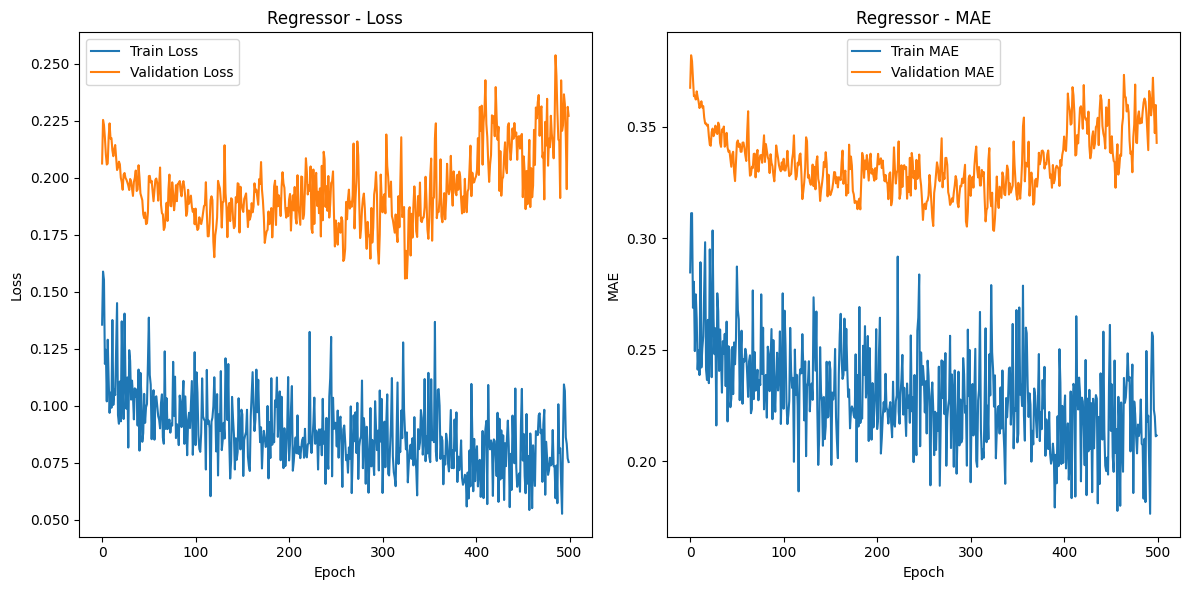

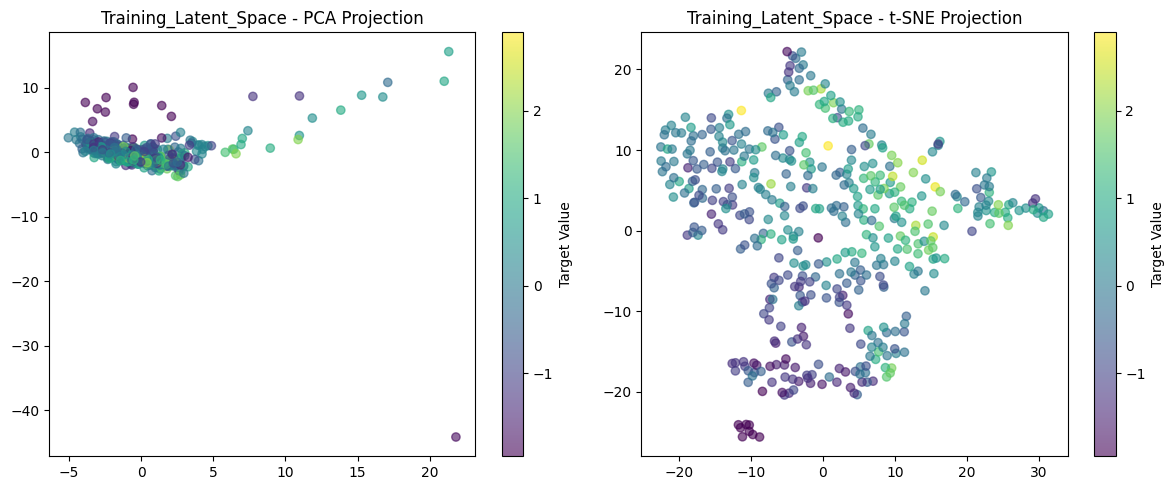

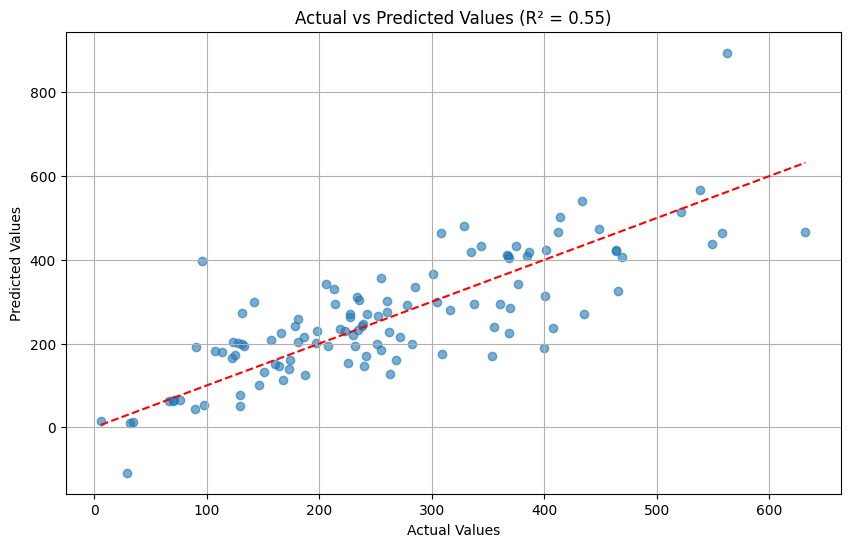

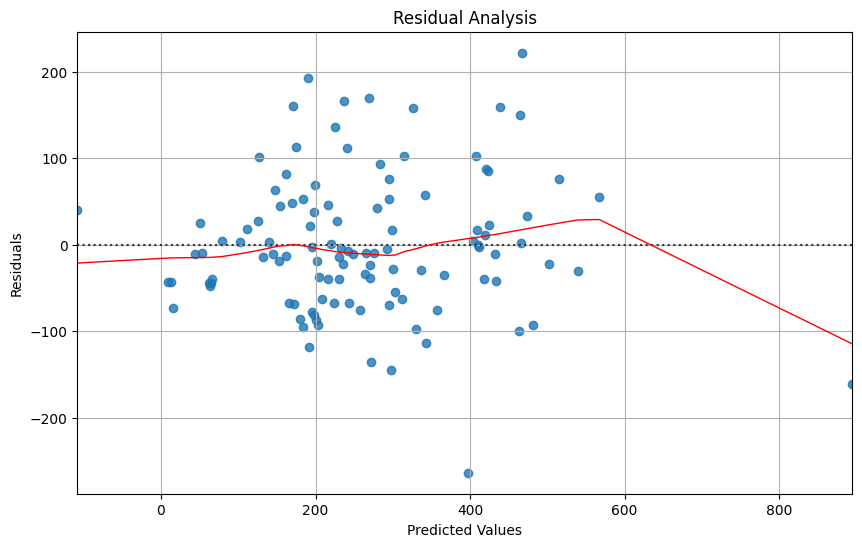

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Functional name=regressor, built=True> does not.

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.inspection import permutation_importance
import numpy as np

# 1. Training History Visualization
def plot_training_history(history, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    if 'mae' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Train MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title(f'{title} - MAE')
        plt.ylabel('MAE')
        plt.xlabel('Epoch')
        plt.legend()

    plt.tight_layout()
    plt.savefig(f'{title}_training_history.png')
    plt.show()

# Plot autoencoder training history
plot_training_history(history, "Autoencoder")

# Plot regressor training history (after training best_regressor)
regressor_history = best_regressor.fit(latent_train, y_train,
                                      epochs=reg_epochs,
                                      batch_size=32,
                                      validation_split=0.1,
                                      verbose=1)
plot_training_history(regressor_history, "Regressor")

# 2. Latent Space Visualization
def visualize_latent_space(latent_rep, y, title):
    plt.figure(figsize=(12, 5))

    # PCA Visualization
    plt.subplot(1, 2, 1)
    pca = PCA(n_components=2)
    latent_pca = pca.fit_transform(latent_rep)
    plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.colorbar(label='Target Value')
    plt.title(f'{title} - PCA Projection')

    # t-SNE Visualization
    plt.subplot(1, 2, 2)
    tsne = TSNE(n_components=2, perplexity=30)
    latent_tsne = tsne.fit_transform(latent_rep)
    plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.colorbar(label='Target Value')
    plt.title(f'{title} - t-SNE Projection')

    plt.tight_layout()
    plt.savefig(f'{title}_latent_space.png')
    plt.show()

visualize_latent_space(latent_train, y_train, "Training_Latent_Space")

# 3. Prediction Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred, alpha=0.6)
plt.plot([min(y_test_inv), max(y_test_inv)],
         [min(y_test_inv), max(y_test_inv)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values (R² = {r2:.2f})')
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()

# 4. Residual Plot
residuals = y_test_inv - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True,
             line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True)
plt.savefig('residual_plot.png')
plt.show()

# 5. Feature Importance (Permutation Importance)
result = permutation_importance(best_regressor, latent_test, y_test_inv,
                                n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.arange(latent_train.shape[1])[sorted_idx])
plt.title("Permutation Importance (Latent Features)")
plt.xlabel("Importance")
plt.ylabel("Latent Feature Index")
plt.savefig('feature_importance.png')
plt.show()

# 6. Model Architecture Visualization
from tensorflow.keras.utils import plot_model

# Visualize autoencoder
plot_model(best_model, to_file='autoencoder_architecture.png',
          show_shapes=True, show_layer_names=True)

# Visualize regressor
plot_model(best_regressor, to_file='regressor_architecture.png',
          show_shapes=True, show_layer_names=True)

# 7. Hyperparameter Optimization Results
def plot_hpo_results(tuner):
    results = tuner.oracle.get_best_trials(num_trials=10)
    hp_names = list(tuner.get_best_hyperparameters()[0].values.keys())

    plt.figure(figsize=(15, 8))
    for i, hp_name in enumerate(hp_names):
        plt.subplot(2, 4, i+1)
        values = [t.hyperparameters.values[hp_name] for t in results]
        losses = [t.score for t in results]
        plt.scatter(values, losses)
        plt.title(hp_name)
        plt.xlabel('Value')
        plt.ylabel('Validation Loss')

    plt.tight_layout()
    plt.savefig('hpo_results.png')
    plt.show()

plot_hpo_results(tuner)
plot_hpo_results(tuner_regressor)

In [43]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, regularizers
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# import pandas as pd
# import numpy as np

# # Load your data
# data = pd.read_csv(input_data['dataset_path'])
# X = data.drop("Target", axis=1).values
# y = data["Target"].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalize features and target
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# y_scaler = StandardScaler()
# y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

# # Define input dimension and a latent dimension hyperparameter
# input_dim = X_train.shape[1]
# latent_dim = 16  # You can later tune this via HPO if desired

# # Build a supervised autoencoder
# input_layer = keras.Input(shape=(input_dim,), name='input')
# # Encoder
# x = layers.Dense(64, activation='relu')(input_layer)
# x = layers.BatchNormalization()(x)
# x = layers.Dropout(0.2)(x)
# latent = layers.Dense(latent_dim, activation='relu',  # using ReLU here to capture non-linearity
#                       activity_regularizer=regularizers.l1(1e-3),
#                       name='latent')(x)

# # Decoder branch for reconstruction
# x_dec = layers.Dense(64, activation='relu')(latent)
# x_dec = layers.BatchNormalization()(x_dec)
# x_dec = layers.Dropout(0.2)(x_dec)
# reconstruction = layers.Dense(input_dim, activation='linear', name='reconstruction')(x_dec)

# # Regression branch for AGB prediction
# regression = layers.Dense(1, activation='linear', name='regression')(latent)

# # Create a model with two outputs
# supervised_autoencoder = keras.Model(inputs=input_layer,
#                                      outputs=[reconstruction, regression],
#                                      name='supervised_autoencoder')

# # Compile the model with weighted losses
# supervised_autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
#                                loss={'reconstruction': 'mse', 'regression': 'mse'},
#                                loss_weights={'reconstruction': 0.5, 'regression': 1.0},
#                                metrics={'regression': 'mae'})

# supervised_autoencoder.summary()

# # Train the model
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
# history = supervised_autoencoder.fit(X_train,
#                                      {'reconstruction': X_train, 'regression': y_train},
#                                      epochs=300,
#                                      batch_size=32,
#                                      validation_split=0.1,
#                                      callbacks=[early_stop],
#                                      verbose=1)

# # Evaluate on test set
# recon_test, y_pred_scaled = supervised_autoencoder.predict(X_test)
# y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# mse_value = mean_squared_error(y_test_inv, y_pred)
# r2 = r2_score(y_test_inv, y_pred)
# print(f"Test MSE for AGB prediction: {mse_value:.4f}")
# print(f"Test R^2 for AGB prediction: {r2:.4f}")

In [45]:
# # Try 2
# #load data
# data = pd.read_csv(input_data['dataset_path'])
# X = data.drop("Target", axis=1).values
# y = data["Target"].values

# # 2. Split into training and testing datasets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 3. Normalize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Optionally, normalize the target (helpful if target values vary widely)
# y_scaler = StandardScaler()
# y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

# input_dim = X_train.shape[1]

In [46]:
# def build_autoencoder(hp):
#     # Hyperparameters to tune
#     units = hp.Int('units', min_value=32, max_value=128, step=4)
#     latent_dim = hp.Int('latent_dim', min_value=8, max_value=64, step=4)
#     dropout_rate = hp.Float('dropout_rate', 0.1, 0.7, step=0.1)
#     l1_reg = hp.Float('l1', 1e-4, 1e-2, sampling='log')
#     lr = hp.Choice('lr', [1e-3, 1e-4])

#     # Input layer
#     input_layer = keras.Input(shape=(input_dim,))

#     # Encoder: First hidden layer
#     x = layers.Dense(units, activation='relu')(input_layer)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     # Encoder: Second hidden layer (added layer)
#     x = layers.Dense(units // 2, activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     # Latent layer with L1 activity regularizer to enforce sparsity
#     latent = layers.Dense(latent_dim, activation='linear',
#                           activity_regularizer=regularizers.l1(l1_reg),
#                           name="latent")(x)

#     # Decoder: First hidden layer (mirroring the encoder)
#     x = layers.Dense(units // 2, activation='relu')(latent)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     # Decoder: Second hidden layer (mirroring the encoder)
#     x = layers.Dense(units, activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(dropout_rate)(x)

#     # Output layer: reconstruct the input
#     output_layer = layers.Dense(input_dim, activation='linear')(x)

#     autoencoder = keras.Model(inputs=input_layer, outputs=output_layer, name="sparse_autoencoder")
#     autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mse')
#     return autoencoder


In [47]:
# tuner = kt.Hyperband(build_autoencoder,
#                      objective='val_loss',
#                      max_epochs=50,
#                      factor=3,
#                      directory='autoencoder_tuning',
#                      project_name='sparse_ae')

# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# tuner.search(X_train, X_train, epochs=50, validation_split=0.1, callbacks=[early_stop], verbose=1)

# # Get the best hyperparameters and display them
# best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
# print("Best Hyperparameters:")
# print(best_hp.values)

# # Build the autoencoder with the best hyperparameters and train it
# autoencoder = build_autoencoder(best_hp)
# history = autoencoder.fit(X_train, X_train,
#                           epochs=50,
#                           batch_size=32,
#                           validation_split=0.1,
#                           callbacks=[early_stop],
#                           verbose=1)

# # Confirm that it’s a Sparse Autoencoder (the latent layer includes an L1 regularizer)
# print("Sparse Autoencoder defined with L1 regularization on the latent layer (named 'latent').")

In [ ]:
# # 6. Create the Encoder Model for Feature Extraction
# encoder = keras.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("latent").output)
# latent_train = encoder.predict(X_train)
# latent_test = encoder.predict(X_test)

In [ ]:
# # Using RF instead of NN
# # 7. Downstream Regression: Random Forest with Cross Validation
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# # Use 5-fold cross validation on the latent features
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(rf_regressor, latent_train, y_train, cv=kf, scoring='r2')
# print(f"Random Forest CV R^2 scores: {cv_scores}")
# print(f"Mean CV R^2: {np.mean(cv_scores):.4f}")

# # Train RF on the entire training latent features and evaluate on the test set
# rf_regressor.fit(latent_train, y_train)
# y_pred_rf_scaled = rf_regressor.predict(latent_test)
# # Inverse transform predictions to original scale
# y_pred_rf = y_scaler.inverse_transform(y_pred_rf_scaled.reshape(-1, 1)).flatten()
# y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# mse_rf = mean_squared_error(y_test_inv, y_pred_rf)
# r2_rf = r2_score(y_test_inv, y_pred_rf)
# print(f"Random Forest Test MSE: {mse_rf:.4f}")
# print(f"Random Forest Test R^2: {r2_rf:.4f}")

In [ ]:
# # 8. Comparing with a Neural Network Regressor using CV
# def build_regressor():
#     reg_input = keras.Input(shape=(best_hp.get('latent_dim'),))
#     x = layers.Dense(32, activation='relu')(reg_input)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(0.2)(x)
#     x = layers.Dense(16, activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Dropout(0.2)(x)
#     reg_output = layers.Dense(1, activation='linear')(x)
#     model = keras.Model(inputs=reg_input, outputs=reg_output, name="nn_regressor")
#     model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#     return model

# # Using KFold CV for the NN regressor
# num_folds = 5
# fold_no = 1
# nn_cv_scores = []

# for train_idx, val_idx in kf.split(latent_train):
#     X_tr, X_val = latent_train[train_idx], latent_train[val_idx]
#     y_tr, y_val = y_train[train_idx], y_train[val_idx]

#     nn_model = build_regressor()
#     early_stop_nn = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#     nn_model.fit(X_tr, y_tr, epochs=100, batch_size=32, validation_data=(X_val, y_val),
#                  callbacks=[early_stop_nn], verbose=0)

#     y_val_pred = nn_model.predict(X_val).flatten()
#     r2_val = r2_score(y_val, y_val_pred)
#     nn_cv_scores.append(r2_val)
#     print(f"Fold {fold_no} NN Regressor R^2: {r2_val:.4f}")
#     fold_no += 1

# print(f"Mean NN Regressor CV R^2: {np.mean(nn_cv_scores):.4f}")